In [2]:
import sys
sys.path.append("../")
from MiniTransformersModels.MiniClip import ClipModel

In [3]:
import torch
import random
from PIL import Image, ImageDraw
import numpy as np

# --- 1. Vocabulaire étendu et structuré ---
vocab = {
    0: "<PAD>", 1: "<START>", 2: "<END>",
    3: "a", 4: "the", 5: "is", 6: "photo", 7: "of",
    8: "cat", 9: "dog", 10: "car", 11: "tree", 12: "house",
    13: "sun", 14: "moon", 15: "ball", 16: "fish", 17: "apple",
    18: "red", 19: "blue", 20: "green", 21: "yellow", 22: "gray",
    23: "orange", 24: "brown", 25: "small", 26: "big", 27: "round"
}
vocab_size = len(vocab)

# Mapping inverse pour faciliter la création de phrases
word_to_id = {v: k for k, v in vocab.items()}

# Classes d'objets avec leurs descriptions possibles
class_descriptions = {
    "cat": [
        ["a", "gray", "cat"],
        ["the", "cat", "is", "gray"],
        ["photo", "of", "a", "cat"],
        ["a", "small", "cat"]
    ],
    "dog": [
        ["a", "brown", "dog"],
        ["the", "dog", "is", "brown"],
        ["photo", "of", "a", "dog"],
        ["a", "big", "dog"]
    ],
    "car": [
        ["a", "blue", "car"],
        ["the", "car", "is", "blue"],
        ["photo", "of", "a", "car"],
        ["a", "small", "car"]
    ],
    "tree": [
        ["a", "green", "tree"],
        ["the", "tree", "is", "green"],
        ["photo", "of", "a", "tree"],
        ["a", "big", "tree"]
    ],
    "house": [
        ["a", "orange", "house"],
        ["the", "house", "is", "orange"],
        ["photo", "of", "a", "house"],
        ["a", "small", "house"]
    ],
    "sun": [
        ["a", "yellow", "sun"],
        ["the", "sun", "is", "yellow"],
        ["photo", "of", "the", "sun"],
        ["a", "round", "sun"]
    ],
    "moon": [
        ["a", "gray", "moon"],
        ["the", "moon", "is", "gray"],
        ["photo", "of", "the", "moon"],
        ["a", "round", "moon"]
    ],
    "ball": [
        ["a", "red", "ball"],
        ["the", "ball", "is", "red"],
        ["photo", "of", "a", "ball"],
        ["a", "round", "ball"]
    ],
    "fish": [
        ["a", "blue", "fish"],
        ["the", "fish", "is", "blue"],
        ["photo", "of", "a", "fish"],
        ["a", "small", "fish"]
    ],
    "apple": [
        ["a", "green", "apple"],
        ["the", "apple", "is", "green"],
        ["photo", "of", "an", "apple"],
        ["a", "round", "apple"]
    ]
}

# --- 2. Générateur d'images amélioré avec plus de variations ---
def generate_image_for_class(cls_name, size=32, seed=None):
    if seed is not None:
        random.seed(seed)
    
    img = Image.new("RGB", (size, size), color=(240, 240, 240))
    draw = ImageDraw.Draw(img)
    
    # Petites variations de position
    offset_x = random.randint(-2, 2)
    offset_y = random.randint(-2, 2)
    
    if cls_name == "cat":
        # Corps gris avec oreilles
        draw.ellipse((8+offset_x, 10+offset_y, 24+offset_x, 26+offset_y), fill=(150, 150, 150))
        # Oreilles
        draw.polygon([(10+offset_x, 10+offset_y), (8+offset_x, 4+offset_y), (14+offset_x, 10+offset_y)], fill=(150, 150, 150))
        draw.polygon([(22+offset_x, 10+offset_y), (18+offset_x, 10+offset_y), (24+offset_x, 4+offset_y)], fill=(150, 150, 150))
        
    elif cls_name == "dog":
        # Corps marron
        draw.rectangle((8+offset_x, 12+offset_y, 24+offset_x, 26+offset_y), fill=(139, 90, 43))
        # Tête
        draw.ellipse((10+offset_x, 6+offset_y, 22+offset_x, 16+offset_y), fill=(139, 90, 43))
        
    elif cls_name == "car":
        # Carrosserie bleue
        draw.rectangle((6+offset_x, 16+offset_y, 26+offset_x, 24+offset_y), fill=(50, 100, 200))
        # Toit
        draw.rectangle((10+offset_x, 12+offset_y, 22+offset_x, 16+offset_y), fill=(70, 120, 220))
        # Roues
        draw.ellipse((8+offset_x, 22+offset_y, 12+offset_x, 26+offset_y), fill=(40, 40, 40))
        draw.ellipse((20+offset_x, 22+offset_y, 24+offset_x, 26+offset_y), fill=(40, 40, 40))
        
    elif cls_name == "tree":
        # Tronc marron
        draw.rectangle((14+offset_x, 18+offset_y, 18+offset_x, 28+offset_y), fill=(101, 67, 33))
        # Feuillage vert (plusieurs cercles)
        draw.ellipse((8+offset_x, 8+offset_y, 18+offset_x, 18+offset_y), fill=(34, 139, 34))
        draw.ellipse((14+offset_x, 6+offset_y, 24+offset_x, 16+offset_y), fill=(50, 155, 50))
        draw.ellipse((10+offset_x, 12+offset_y, 22+offset_x, 20+offset_y), fill=(34, 139, 34))
        
    elif cls_name == "house":
        # Murs orange
        draw.rectangle((8+offset_x, 14+offset_y, 24+offset_x, 26+offset_y), fill=(255, 140, 50))
        # Toit rouge
        draw.polygon([(8+offset_x, 14+offset_y), (24+offset_x, 14+offset_y), (16+offset_x, 4+offset_y)], fill=(200, 50, 50))
        # Porte
        draw.rectangle((14+offset_x, 20+offset_y, 18+offset_x, 26+offset_y), fill=(101, 67, 33))
        # Fenêtre
        draw.rectangle((10+offset_x, 16+offset_y, 13+offset_x, 19+offset_y), fill=(173, 216, 230))
        
    elif cls_name == "sun":
        # Cercle jaune avec rayons
        draw.ellipse((10+offset_x, 10+offset_y, 22+offset_x, 22+offset_y), fill=(255, 215, 0))
        # Rayons
        for angle in range(0, 360, 45):
            rad = np.radians(angle)
            x1 = 16 + offset_x + int(8 * np.cos(rad))
            y1 = 16 + offset_y + int(8 * np.sin(rad))
            x2 = 16 + offset_x + int(12 * np.cos(rad))
            y2 = 16 + offset_y + int(12 * np.sin(rad))
            draw.line([(x1, y1), (x2, y2)], fill=(255, 215, 0), width=2)
            
    elif cls_name == "moon":
        # Croissant de lune gris
        draw.ellipse((8+offset_x, 8+offset_y, 24+offset_x, 24+offset_y), fill=(192, 192, 192))
        draw.ellipse((12+offset_x, 8+offset_y, 28+offset_x, 24+offset_y), fill=(240, 240, 240))
        
    elif cls_name == "ball":
        # Balle rouge avec reflet
        draw.ellipse((8+offset_x, 8+offset_y, 24+offset_x, 24+offset_y), fill=(220, 50, 50))
        draw.ellipse((12+offset_x, 10+offset_y, 16+offset_x, 14+offset_y), fill=(255, 150, 150))
        
    elif cls_name == "fish":
        # Corps du poisson bleu
        draw.ellipse((8+offset_x, 12+offset_y, 20+offset_x, 20+offset_y), fill=(70, 130, 180))
        # Queue
        draw.polygon([(20+offset_x, 16+offset_y), (26+offset_x, 12+offset_y), (26+offset_x, 20+offset_y)], fill=(70, 130, 180))
        # Œil
        draw.ellipse((16+offset_x, 14+offset_y, 18+offset_x, 16+offset_y), fill=(255, 255, 255))
        
    elif cls_name == "apple":
        # Pomme verte
        draw.ellipse((10+offset_x, 12+offset_y, 22+offset_x, 24+offset_y), fill=(50, 205, 50))
        # Tige
        draw.rectangle((15+offset_x, 8+offset_y, 17+offset_x, 12+offset_y), fill=(101, 67, 33))
        # Feuille
        draw.ellipse((17+offset_x, 8+offset_y, 21+offset_x, 11+offset_y), fill=(34, 139, 34))
    
    # Convertir en tensor (H, W, C)
    arr = torch.tensor(np.array(img), dtype=torch.float32) / 255.0
    return arr

# --- 3. Fonction pour créer des tokens de texte cohérents ---
def text_to_tokens(words, max_len=12):
    """Convertit une liste de mots en tokens avec padding"""
    tokens = [word_to_id["<START>"]]
    for word in words:
        if word in word_to_id:
            tokens.append(word_to_id[word])
    tokens.append(word_to_id["<END>"])
    
    # Padding
    while len(tokens) < max_len:
        tokens.append(word_to_id["<PAD>"])
    
    return torch.tensor(tokens[:max_len], dtype=torch.long)

# --- 4. Génération du dataset cohérent ---
def generate_clip_like_data(n_samples=50, max_text_len=12):
    text_tokens = []
    images = []
    labels = []
    
    classes = list(class_descriptions.keys())
    
    for i in range(n_samples):
        # Choisir une classe aléatoire
        cls_name = random.choice(classes)
        cls_idx = classes.index(cls_name)
        
        # Choisir une description aléatoire pour cette classe
        description = random.choice(class_descriptions[cls_name])
        
        # Créer les tokens de texte cohérents
        text_token = text_to_tokens(description, max_text_len)
        text_tokens.append(text_token)
        
        # Générer l'image correspondante avec une seed pour la variation
        img = generate_image_for_class(cls_name, size=32, seed=i)
        images.append(img)
        
        labels.append(cls_idx)
    
    return (
        torch.stack(text_tokens),           # (N, max_text_len)
        torch.stack(images)                  # (N, C, H, W)
    ), torch.tensor(labels)




Genearting Data 

In [4]:
# --- 5. Génération des datasets ---
print("Génération des données d'entraînement...")
x_train, y_train = generate_clip_like_data(1500, max_text_len=12)
print("Génération des données de test...")
x_test, y_test = generate_clip_like_data(100, max_text_len=12)

print("\n=== Statistiques du dataset ===")
print(f"x_train text: {x_train[0].shape}")      # (5000, 12)
print(f"x_train images: {x_train[1].shape}")    # (5000, 3, 32, 32)
print(f"y_train: {y_train.shape}")              # (5000,)
print(f"\nx_test text: {x_test[0].shape}")
print(f"x_test images: {x_test[1].shape}")
print(f"y_test: {y_test.shape}")

print(f"\nVocabulaire size: {vocab_size}")
print(f"Nombre de classes: {len(class_descriptions)}")


Génération des données d'entraînement...
Génération des données de test...

=== Statistiques du dataset ===
x_train text: torch.Size([1500, 12])
x_train images: torch.Size([1500, 32, 32, 3])
y_train: torch.Size([1500])

x_test text: torch.Size([100, 12])
x_test images: torch.Size([100, 32, 32, 3])
y_test: torch.Size([100])

Vocabulaire size: 28
Nombre de classes: 10


Trainin on the generated Data

In [5]:
clip=ClipModel("adam","Crossentropy",128,28,10,16)
train_losses,val_losses,accs,val_accs=clip.minibatch_SGD_train(10,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.001,accuracy=True)

1 | Train Loss: 15.8208 | Val Loss: 22.1501 | Train Acc: 2.99% | Val Acc: 7.00%
2 | Train Loss: 15.8048 | Val Loss: 22.0853 | Train Acc: 4.48% | Val Acc: 7.00%
3 | Train Loss: 15.7770 | Val Loss: 22.0089 | Train Acc: 4.62% | Val Acc: 2.00%
4 | Train Loss: 15.5777 | Val Loss: 21.9292 | Train Acc: 3.40% | Val Acc: 0.00%
5 | Train Loss: 15.5680 | Val Loss: 21.8414 | Train Acc: 4.48% | Val Acc: 0.00%
6 | Train Loss: 15.4519 | Val Loss: 21.7414 | Train Acc: 3.40% | Val Acc: 0.00%
7 | Train Loss: 15.3673 | Val Loss: 21.6675 | Train Acc: 4.42% | Val Acc: 0.00%
8 | Train Loss: 15.2865 | Val Loss: 21.6354 | Train Acc: 4.28% | Val Acc: 0.00%
9 | Train Loss: 15.2809 | Val Loss: 21.6177 | Train Acc: 3.67% | Val Acc: 0.00%
10 | Train Loss: 15.2480 | Val Loss: 21.6011 | Train Acc: 2.65% | Val Acc: 0.00%


ploting the results

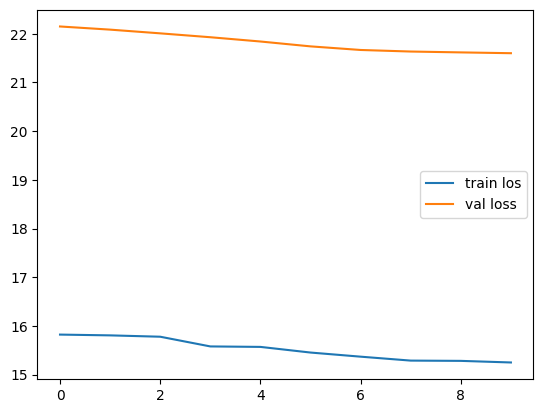

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)),train_losses,label="train los")
plt.plot(range(len(train_losses)),val_losses,label="val loss")
plt.legend()



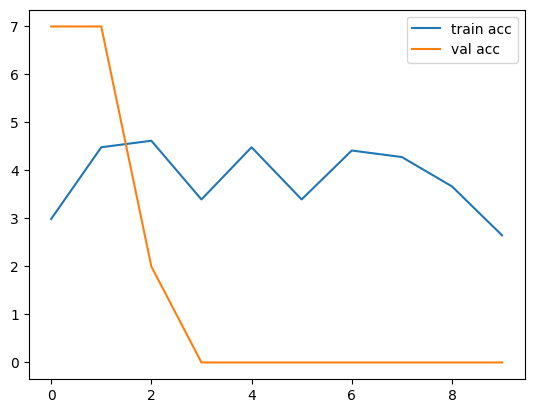

In [10]:
plt.plot(range(len(train_losses)),accs,label="train acc")
plt.plot(range(len(train_losses)),val_accs,label="val acc")
plt.legend()